In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# grouping by the product id's purchase amount(mean purchase)
df.groupby(['Product_ID'])['Purchase'].mean().sort_values(ascending=False)

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
                 ...     
P00372445      374.930705
P00375436      374.266585
P00371644      362.911012
P00370853       37.393643
P00370293       36.675159
Name: Purchase, Length: 3631, dtype: float64

In [8]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [9]:
# grouping by product category 1 and their purchase
df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False)

Product_Category_1
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

In [10]:
df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False)

Product_Category_2
10.0    15648.729543
2.0     13619.356401
6.0     11503.551379
3.0     11235.359570
15.0    10357.077691
16.0    10295.681933
8.0     10273.259518
4.0     10215.192001
13.0     9683.352388
17.0     9421.576577
18.0     9352.440433
5.0      9027.821574
11.0     8940.580515
9.0      7277.006851
14.0     7105.264916
12.0     6975.472504
7.0      6884.683706
Name: Purchase, dtype: float64

In [11]:
# grouping by product category 3 and their purchase
df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False)

Product_Category_3
3.0     13939.696574
10.0    13505.813441
6.0     13194.311043
13.0    13185.118703
8.0     13024.918882
15.0    12339.369900
5.0     12117.786889
11.0    12091.437673
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
9.0     10431.697210
14.0    10052.594530
4.0      9794.386667
12.0     8715.512762
Name: Purchase, dtype: float64

In [12]:
# grouping by age and look their purchase
df.groupby('Age')['Purchase'].mean().sort_values(ascending=False)

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

In [13]:
df.groupby('City_Category')['Purchase'].mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

In [14]:
# grouping by gender and looking at purchase
df.groupby('Gender')['Purchase'].mean().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

In [15]:
# grouping by occupation and looking at purchase
df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

In [16]:
# Grouping by stay in city and looking at purchase
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending=False)

Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

In [17]:
# Counting frequency of product id
df.groupby(['Product_ID'])['Product_ID'].count()

Product_ID
P00000142    1152
P00000242     376
P00000342     244
P00000442      92
P00000542     149
             ... 
P0099442      200
P0099642       13
P0099742      126
P0099842      102
P0099942       14
Name: Product_ID, Length: 3631, dtype: int64

In [18]:
# Creating a feature showing count of product id frequency
df['Prod_ID_Freq'] = df.groupby('Product_ID')['Product_ID'].transform('count')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,227
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,581
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,102
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,341
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,203


<Axes: xlabel='Purchase', ylabel='Density'>

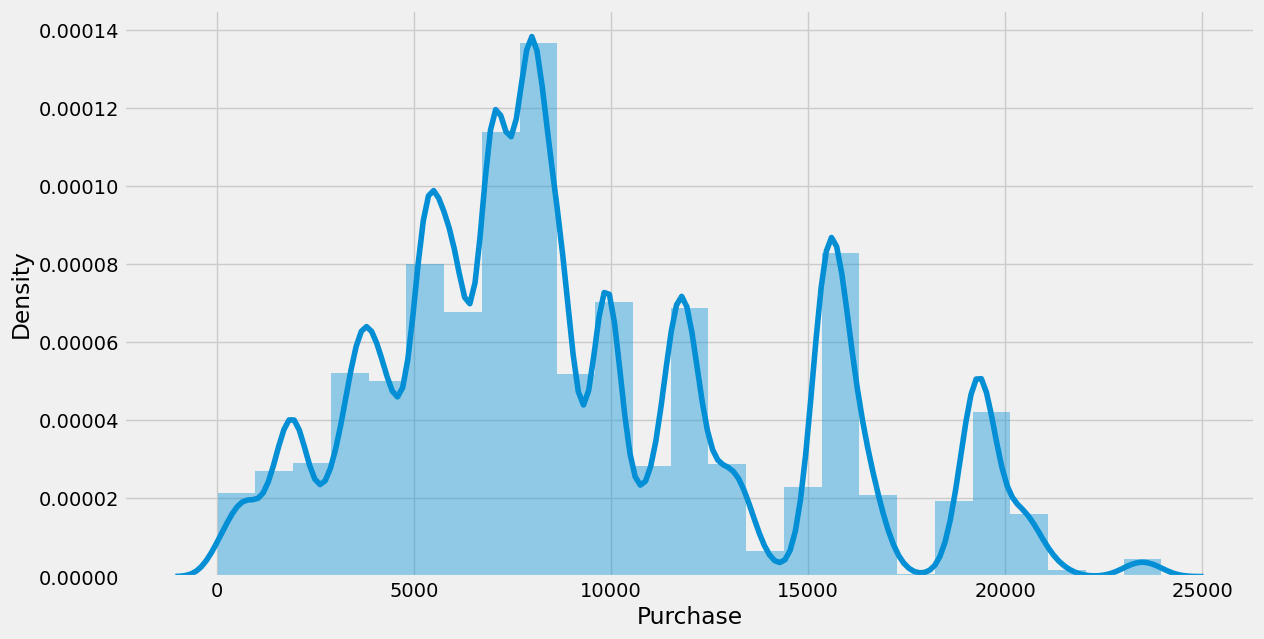

In [19]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

<Axes: xlabel='Age', ylabel='count'>

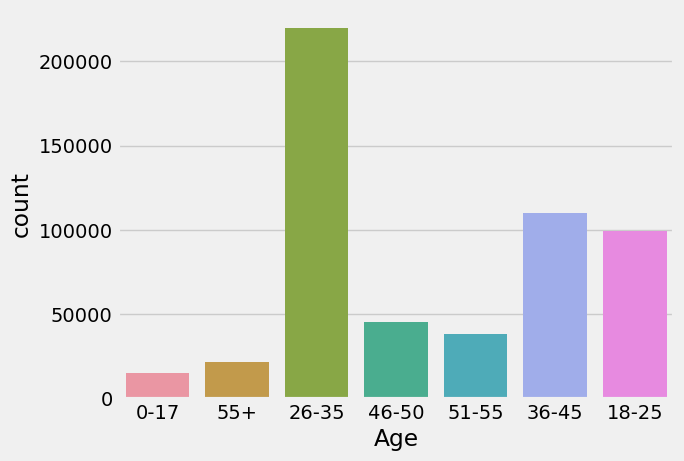

In [20]:
sns.countplot( x = "Age", data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

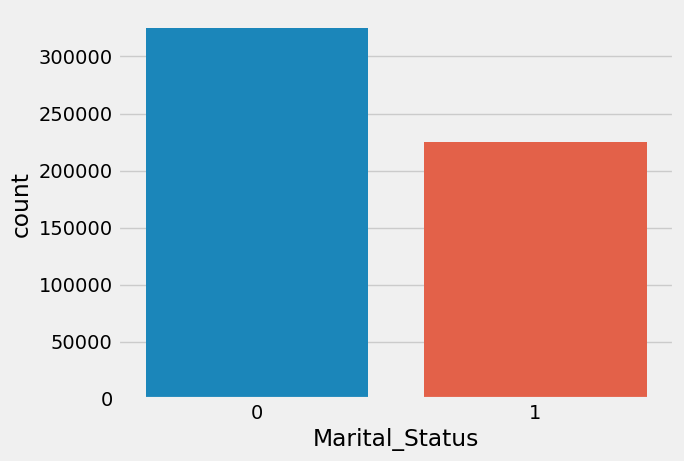

In [21]:
sns.countplot( x = "Marital_Status", data = df)

<Axes: xlabel='Occupation', ylabel='count'>

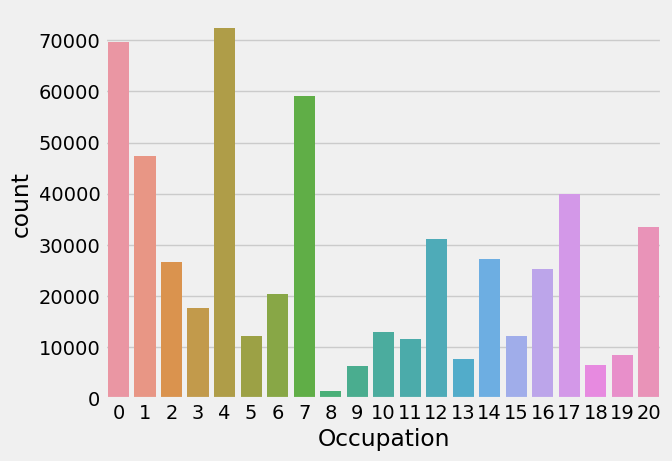

In [22]:
#8 catagory can be ignored as it has way lesser compare to others 
sns.countplot( x = "Occupation", data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

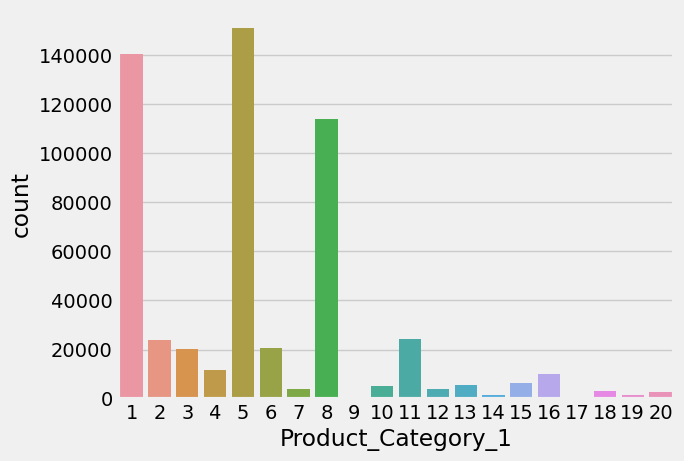

In [23]:
sns.countplot( x = "Product_Category_1", data = df)

<Axes: xlabel='Product_Category_2', ylabel='count'>

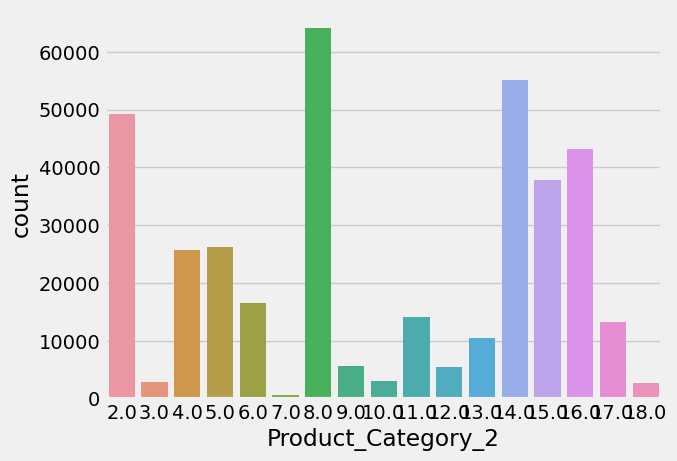

In [24]:
sns.countplot( x = "Product_Category_2", data = df)

<Axes: xlabel='Product_Category_3', ylabel='count'>

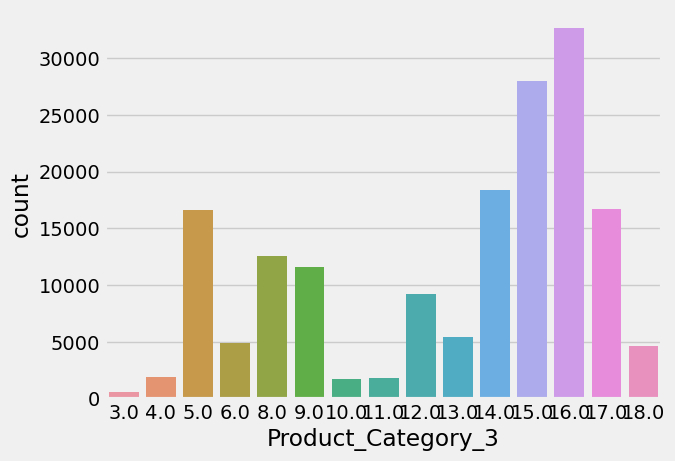

In [25]:
sns.countplot( x = "Product_Category_3", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

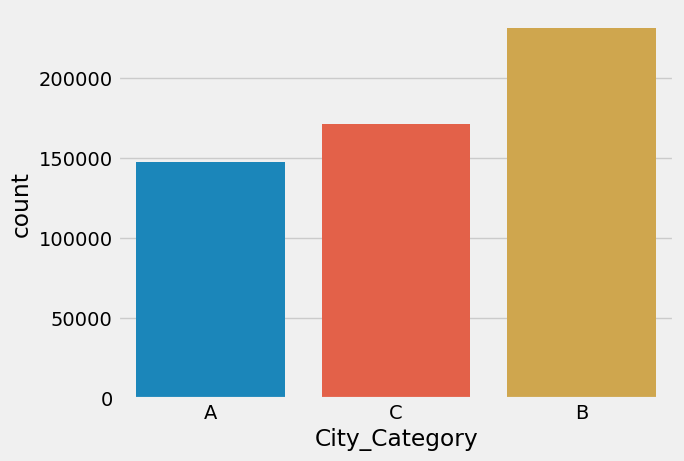

In [26]:
sns.countplot( x = "City_Category", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

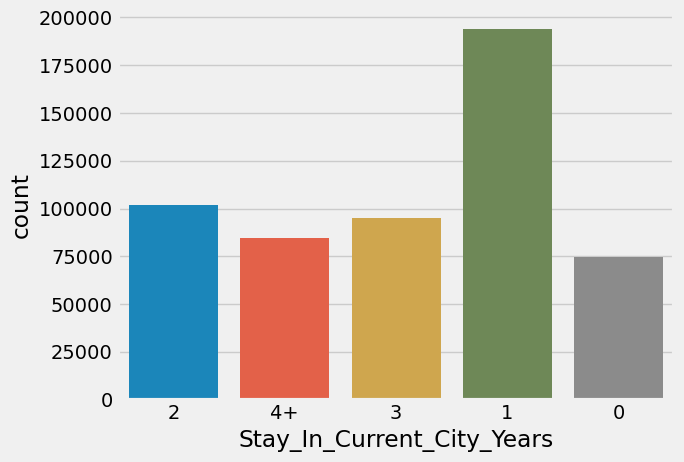

In [27]:
sns.countplot( x = "Stay_In_Current_City_Years", data = df)

Text(0.5, 1.0, 'Occupation and Purchase Analysis')

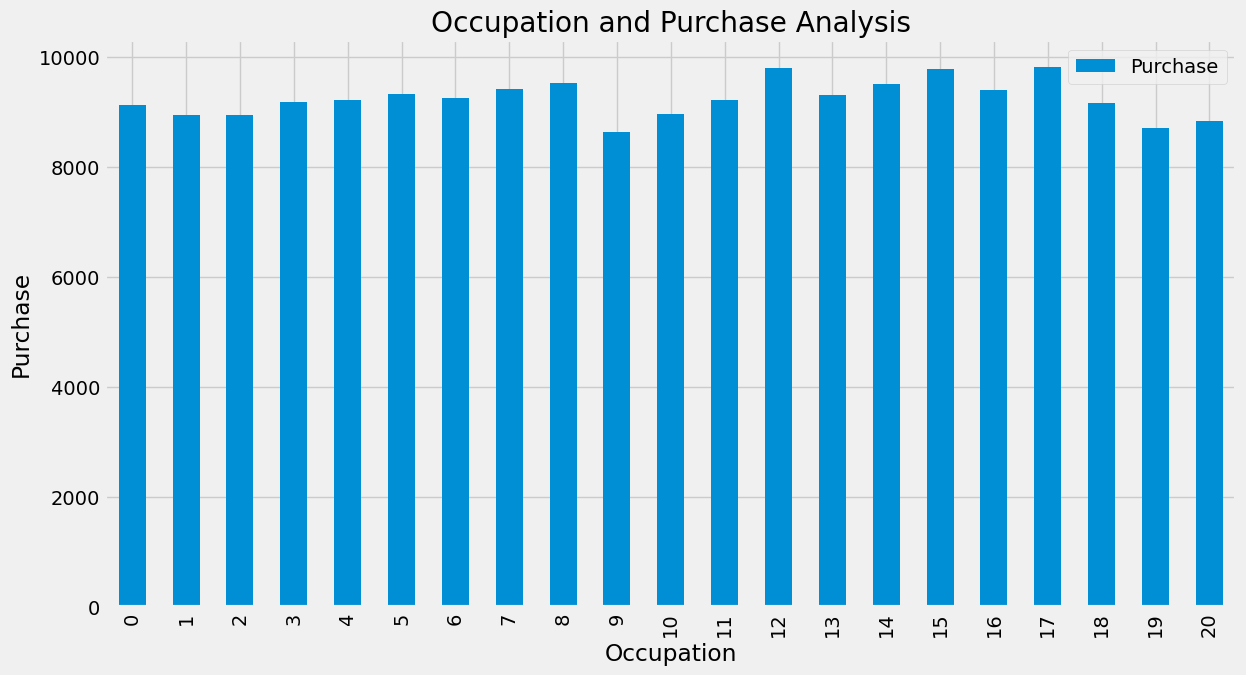

In [28]:
#bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values= 'Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")

Text(0.5, 1.0, 'Occupation and Purchase Analysis')

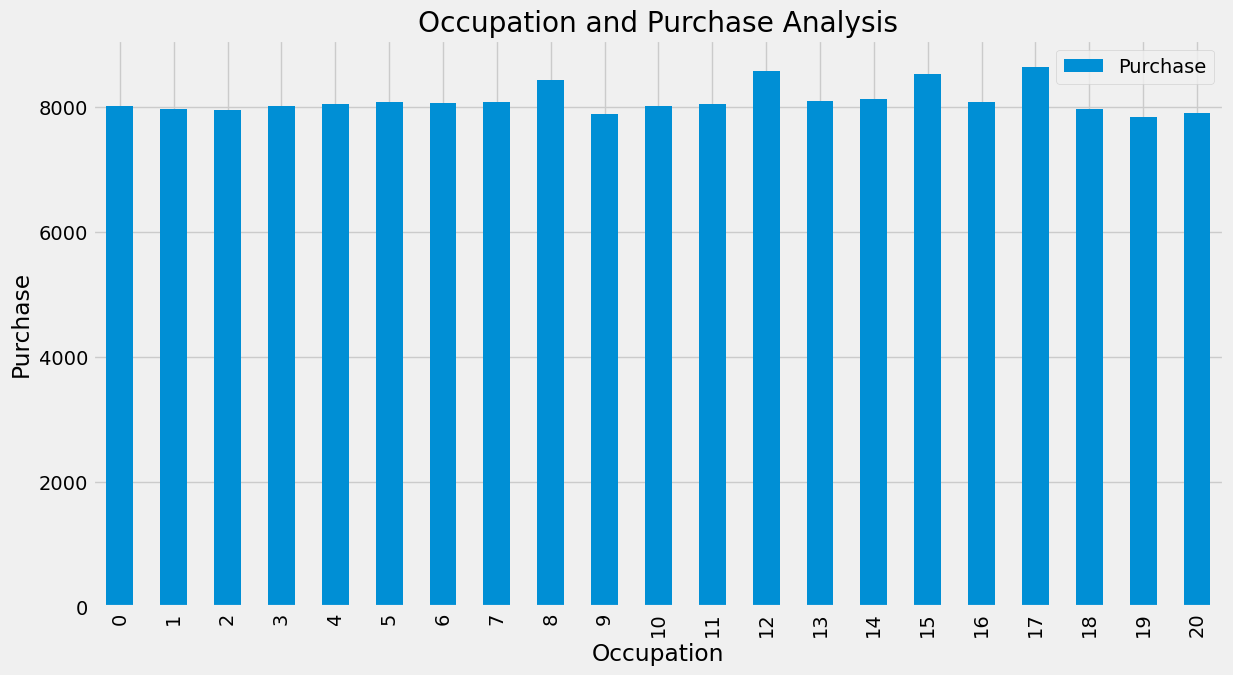

In [29]:
#bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values= 'Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")

Text(0.5, 1.0, 'Age and Purchase Analysis')

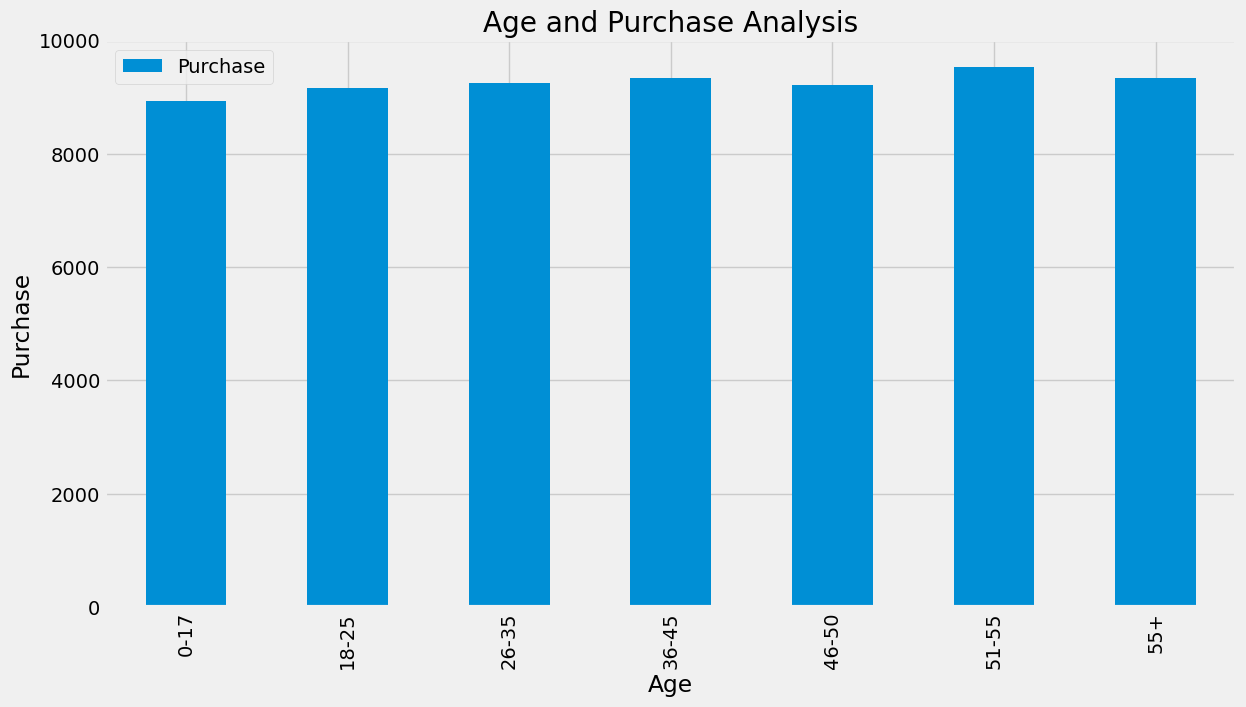

In [30]:
#bivariate analysis for age
Age_plot = df.pivot_table(index='Age', values= 'Purchase', aggfunc=np.mean)
Age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")

Text(0.5, 1.0, 'Gender and Purchase Analysis')

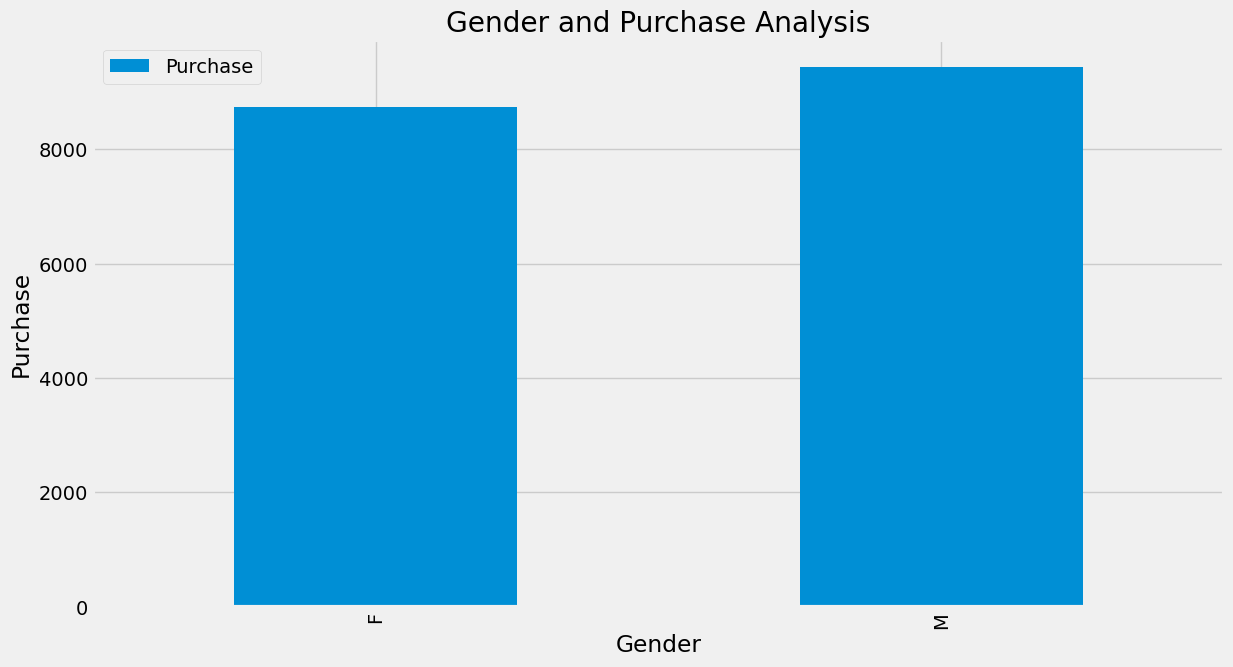

In [31]:
Gender_plot = df.pivot_table(index='Gender', values= 'Purchase', aggfunc=np.mean)
Gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")

Text(0.5, 1.0, 'Gender and Marital_Status')

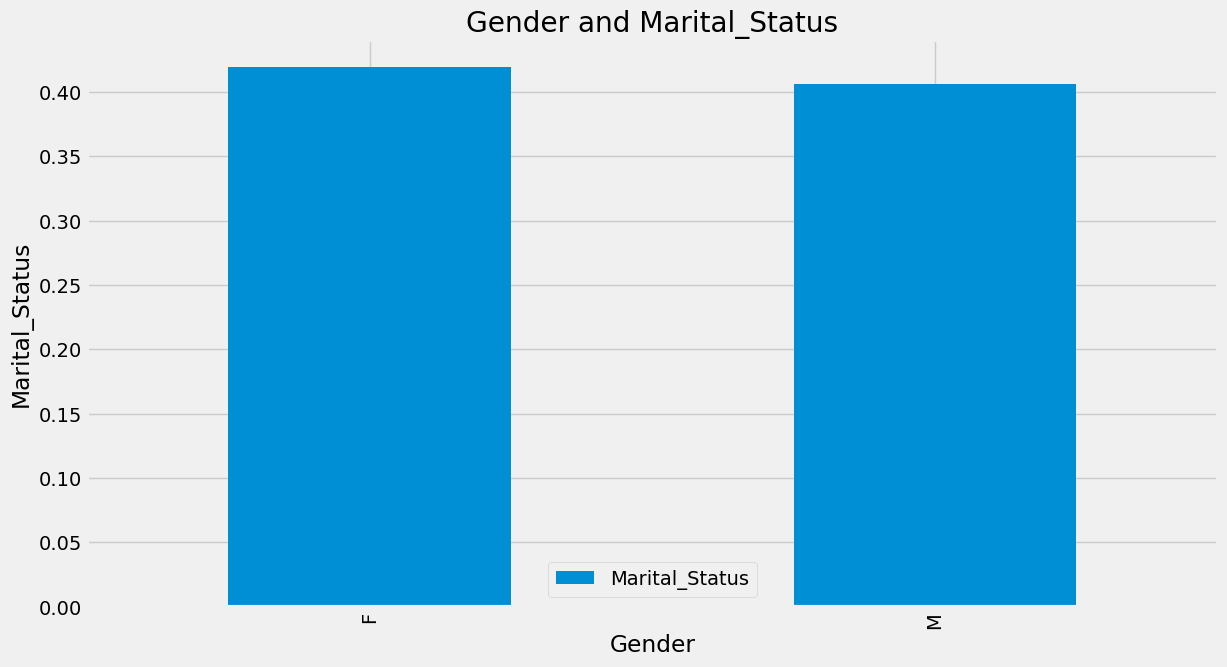

In [32]:
Gender_plot = df.pivot_table(index='Gender', values= 'Marital_Status', aggfunc=np.mean)
Gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Marital_Status")
plt.title("Gender and Marital_Status")

In [33]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [34]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city.rename(columns = {'B': 'cityB', 'C': 'cityC'}, inplace=True)
df = pd.concat([df, city], axis=1)

In [36]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
df = df.drop('City_Category', axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq,cityB,cityC
0,1000001,P00069042,0,1,10,NaN,0,3,NaN,NaN,8370,227,False,False
1,1000001,P00248942,0,1,10,NaN,0,1,6.0,14.0,15200,581,False,False
2,1000001,P00087842,0,1,10,NaN,0,12,NaN,NaN,1422,102,False,False
3,1000001,P00085442,0,1,10,NaN,0,12,14.0,NaN,1057,341,False,False
4,1000002,P00285442,1,7,16,NaN,0,8,NaN,NaN,7969,203,False,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  0 non-null       float64
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Prod_ID_Freq                550068 non-null  int64  
 12  cityB                       550068 non-null  bool   
 13  cityC         

In [38]:
#check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years    550068
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Prod_ID_Freq                       0
cityB                              0
cityC                              0
dtype: int64

In [39]:
# imputing with value 0, it won't affect the model 
# Model will ignore these zeros while fitting

df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)

# Model Selection

In [41]:
#  Dropping unnecessary columns
df= df.drop(['User_ID', 'Product_ID'], axis=1)

In [44]:
#Label encoding
cols = ['Age', 'Stay_In_Current_City_Years'] 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col]= le.fit_transform(df[col])
  
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq,cityB,cityC
0,0,0,10,0,0,3,0.0,0.0,8370,227,False,False
1,0,0,10,0,0,1,6.0,14.0,15200,581,False,False
2,0,0,10,0,0,12,0.0,0.0,1422,102,False,False
3,0,0,10,0,0,12,14.0,0.0,1057,341,False,False
4,1,6,16,0,0,8,0.0,0.0,7969,203,False,True


# Input Split

In [46]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

In [49]:
X = df.drop(columns=['Purchase'])
y = df['Purchase']

Results
MSE: 4512.14797127539
CV Score: 4513.744996280998


<Axes: title={'center': 'Model Coefficients'}>

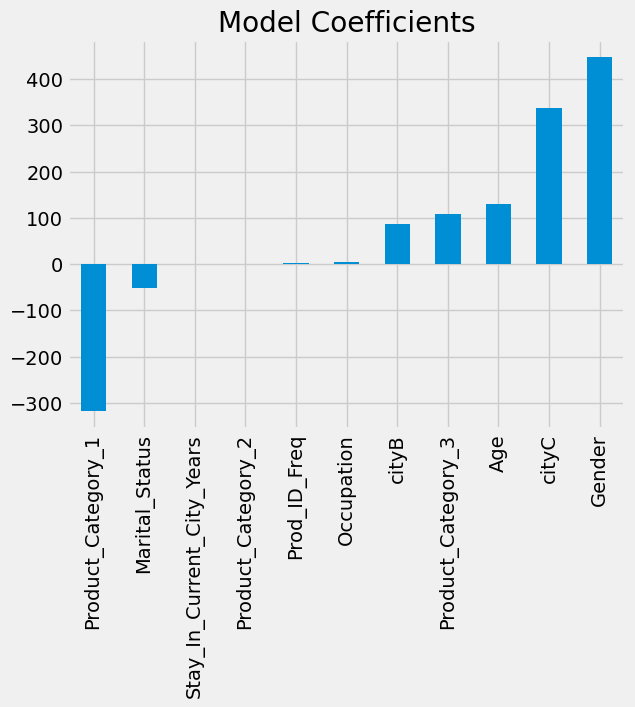

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3567.480050196491
CV Score: 3521.5383401369354


<Axes: title={'center': 'Feature Importance'}>

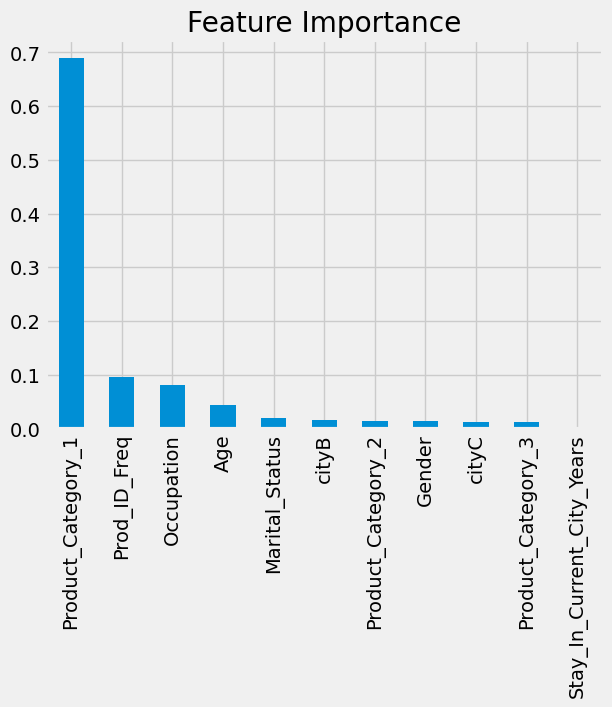

In [51]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming train function and other necessary imports are already defined

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the KNN model using the train function
train(knn_model, X, y)

# Since KNN doesn't provide coefficients like linear regression, there's no need for the coefficient plotting


Results
MSE: 2969.803452491075
CV Score: 3017.931410183092


In [53]:
import xgboost as xgb

# Assuming train function and other necessary imports are already defined

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the XGBoost model using the train function
train(xgb_model, X, y)

# XGBoost doesn't provide coefficients like linear regression, so there's no need for the coefficient plotting

Results
MSE: 2684.0996488834953
CV Score: 2692.552399032295


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming train function and other necessary imports are already defined

# Initialize the GBM model
gbm_model = GradientBoostingRegressor()

# Train the GBM model using the train function
train(gbm_model, X, y)

# GBM doesn't provide coefficients like linear regression, so there's no need for the coefficient plotting


Results
MSE: 2846.140283473637
CV Score: 2859.597115672484


In [55]:
import lightgbm as lgb

# Assuming train function and other necessary imports are already defined

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Train the LightGBM model using the train function
train(lgb_model, X, y)

# LightGBM doesn't provide coefficients like linear regression, so there's no need for the coefficient plotting

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 385047, number of used features: 10
[LightGBM] [Info] Start training from score 9272.087015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 10
[LightGBM] [Info] Start training from score 9253.402592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [56]:
from catboost import CatBoostRegressor

# Assuming train function and other necessary imports are already defined

# Initialize the CatBoost model
catboost_model = CatBoostRegressor()

# Train the CatBoost model using the train function
train(catboost_model, X, y)

# CatBoost doesn't provide coefficients like linear regression, so there's no need for the coefficient plotting

Learning rate set to 0.10488
0:	learn: 4772.4820179	total: 187ms	remaining: 3m 7s
1:	learn: 4530.9784025	total: 213ms	remaining: 1m 46s
2:	learn: 4333.9933674	total: 242ms	remaining: 1m 20s
3:	learn: 4179.6449307	total: 273ms	remaining: 1m 7s
4:	learn: 4013.9747459	total: 302ms	remaining: 1m
5:	learn: 3877.4555330	total: 328ms	remaining: 54.4s
6:	learn: 3777.4761713	total: 352ms	remaining: 50s
7:	learn: 3660.8085867	total: 374ms	remaining: 46.3s
8:	learn: 3577.5930787	total: 395ms	remaining: 43.5s
9:	learn: 3490.3910827	total: 424ms	remaining: 41.9s
10:	learn: 3425.9556702	total: 448ms	remaining: 40.2s
11:	learn: 3359.8598848	total: 470ms	remaining: 38.7s
12:	learn: 3304.8064129	total: 501ms	remaining: 38s
13:	learn: 3262.0171457	total: 527ms	remaining: 37.1s
14:	learn: 3225.0417301	total: 555ms	remaining: 36.5s
15:	learn: 3180.9083148	total: 584ms	remaining: 35.9s
16:	learn: 3150.3798076	total: 612ms	remaining: 35.4s
17:	learn: 3123.7125271	total: 641ms	remaining: 35s
18:	learn: 3090.

154:	learn: 2773.3262357	total: 4.32s	remaining: 23.5s
155:	learn: 2773.0083910	total: 4.34s	remaining: 23.5s
156:	learn: 2772.6628492	total: 4.36s	remaining: 23.4s
157:	learn: 2772.1959571	total: 4.38s	remaining: 23.4s
158:	learn: 2771.6419117	total: 4.4s	remaining: 23.3s
159:	learn: 2771.3522861	total: 4.43s	remaining: 23.2s
160:	learn: 2770.7003943	total: 4.45s	remaining: 23.2s
161:	learn: 2770.2499078	total: 4.48s	remaining: 23.2s
162:	learn: 2769.7959216	total: 4.5s	remaining: 23.1s
163:	learn: 2769.1963698	total: 4.53s	remaining: 23.1s
164:	learn: 2768.7790378	total: 4.55s	remaining: 23s
165:	learn: 2768.4118551	total: 4.57s	remaining: 23s
166:	learn: 2768.1025544	total: 4.6s	remaining: 22.9s
167:	learn: 2767.6134852	total: 4.62s	remaining: 22.9s
168:	learn: 2767.2158662	total: 4.65s	remaining: 22.9s
169:	learn: 2766.8521856	total: 4.67s	remaining: 22.8s
170:	learn: 2766.4944139	total: 4.7s	remaining: 22.8s
171:	learn: 2766.1084348	total: 4.72s	remaining: 22.7s
172:	learn: 2765.8

309:	learn: 2727.4226220	total: 8.03s	remaining: 17.9s
310:	learn: 2727.2557572	total: 8.05s	remaining: 17.8s
311:	learn: 2727.0061366	total: 8.07s	remaining: 17.8s
312:	learn: 2726.7601549	total: 8.1s	remaining: 17.8s
313:	learn: 2726.5849429	total: 8.12s	remaining: 17.7s
314:	learn: 2726.4178554	total: 8.14s	remaining: 17.7s
315:	learn: 2726.2132057	total: 8.16s	remaining: 17.7s
316:	learn: 2726.0389082	total: 8.19s	remaining: 17.6s
317:	learn: 2725.9405139	total: 8.21s	remaining: 17.6s
318:	learn: 2725.7623390	total: 8.23s	remaining: 17.6s
319:	learn: 2725.4020228	total: 8.25s	remaining: 17.5s
320:	learn: 2725.1746651	total: 8.27s	remaining: 17.5s
321:	learn: 2724.8448203	total: 8.29s	remaining: 17.5s
322:	learn: 2724.6642056	total: 8.31s	remaining: 17.4s
323:	learn: 2724.4369037	total: 8.34s	remaining: 17.4s
324:	learn: 2724.3102898	total: 8.36s	remaining: 17.4s
325:	learn: 2724.0213130	total: 8.38s	remaining: 17.3s
326:	learn: 2723.9435669	total: 8.4s	remaining: 17.3s
327:	learn: 

459:	learn: 2701.4429917	total: 11.5s	remaining: 13.5s
460:	learn: 2701.2761451	total: 11.5s	remaining: 13.5s
461:	learn: 2701.0717097	total: 11.6s	remaining: 13.5s
462:	learn: 2700.9443650	total: 11.6s	remaining: 13.4s
463:	learn: 2700.8146573	total: 11.6s	remaining: 13.4s
464:	learn: 2700.7259193	total: 11.6s	remaining: 13.4s
465:	learn: 2700.5518900	total: 11.7s	remaining: 13.4s
466:	learn: 2700.4715335	total: 11.7s	remaining: 13.3s
467:	learn: 2700.3130657	total: 11.7s	remaining: 13.3s
468:	learn: 2700.1334766	total: 11.7s	remaining: 13.3s
469:	learn: 2700.0079271	total: 11.7s	remaining: 13.2s
470:	learn: 2699.8567929	total: 11.8s	remaining: 13.2s
471:	learn: 2699.6800841	total: 11.8s	remaining: 13.2s
472:	learn: 2699.5450960	total: 11.8s	remaining: 13.2s
473:	learn: 2699.4487451	total: 11.8s	remaining: 13.1s
474:	learn: 2699.2808684	total: 11.8s	remaining: 13.1s
475:	learn: 2699.1486960	total: 11.9s	remaining: 13.1s
476:	learn: 2699.0491450	total: 11.9s	remaining: 13s
477:	learn: 

617:	learn: 2682.7628326	total: 15s	remaining: 9.26s
618:	learn: 2682.6480818	total: 15s	remaining: 9.23s
619:	learn: 2682.5412658	total: 15s	remaining: 9.21s
620:	learn: 2682.4914984	total: 15s	remaining: 9.18s
621:	learn: 2682.4306566	total: 15.1s	remaining: 9.15s
622:	learn: 2682.3034994	total: 15.1s	remaining: 9.13s
623:	learn: 2682.0848255	total: 15.1s	remaining: 9.11s
624:	learn: 2681.9523872	total: 15.1s	remaining: 9.08s
625:	learn: 2681.8617825	total: 15.2s	remaining: 9.05s
626:	learn: 2681.7471724	total: 15.2s	remaining: 9.03s
627:	learn: 2681.6963793	total: 15.2s	remaining: 9s
628:	learn: 2681.6007641	total: 15.2s	remaining: 8.97s
629:	learn: 2681.4684457	total: 15.2s	remaining: 8.95s
630:	learn: 2681.3984274	total: 15.3s	remaining: 8.92s
631:	learn: 2681.3006179	total: 15.3s	remaining: 8.9s
632:	learn: 2681.2241661	total: 15.3s	remaining: 8.87s
633:	learn: 2681.0709857	total: 15.3s	remaining: 8.85s
634:	learn: 2680.9680986	total: 15.3s	remaining: 8.82s
635:	learn: 2680.94639

775:	learn: 2667.9379560	total: 18.4s	remaining: 5.32s
776:	learn: 2667.8304189	total: 18.5s	remaining: 5.3s
777:	learn: 2667.7331474	total: 18.5s	remaining: 5.28s
778:	learn: 2667.6754222	total: 18.5s	remaining: 5.25s
779:	learn: 2667.5855927	total: 18.5s	remaining: 5.23s
780:	learn: 2667.5140779	total: 18.6s	remaining: 5.2s
781:	learn: 2667.4213253	total: 18.6s	remaining: 5.18s
782:	learn: 2667.3600704	total: 18.6s	remaining: 5.15s
783:	learn: 2667.2213696	total: 18.6s	remaining: 5.13s
784:	learn: 2667.1641429	total: 18.6s	remaining: 5.11s
785:	learn: 2667.1146037	total: 18.7s	remaining: 5.08s
786:	learn: 2667.0542977	total: 18.7s	remaining: 5.06s
787:	learn: 2667.0041168	total: 18.7s	remaining: 5.04s
788:	learn: 2666.9114536	total: 18.7s	remaining: 5.01s
789:	learn: 2666.8366535	total: 18.8s	remaining: 4.99s
790:	learn: 2666.7263770	total: 18.8s	remaining: 4.96s
791:	learn: 2666.6066072	total: 18.8s	remaining: 4.94s
792:	learn: 2666.5439999	total: 18.8s	remaining: 4.91s
793:	learn: 

929:	learn: 2655.8843649	total: 21.9s	remaining: 1.65s
930:	learn: 2655.8302112	total: 21.9s	remaining: 1.62s
931:	learn: 2655.7755676	total: 21.9s	remaining: 1.6s
932:	learn: 2655.7088489	total: 21.9s	remaining: 1.57s
933:	learn: 2655.6489619	total: 22s	remaining: 1.55s
934:	learn: 2655.5050514	total: 22s	remaining: 1.53s
935:	learn: 2655.4421444	total: 22s	remaining: 1.5s
936:	learn: 2655.3653784	total: 22s	remaining: 1.48s
937:	learn: 2655.2880834	total: 22.1s	remaining: 1.46s
938:	learn: 2655.2213573	total: 22.1s	remaining: 1.43s
939:	learn: 2655.1590025	total: 22.1s	remaining: 1.41s
940:	learn: 2655.1055936	total: 22.1s	remaining: 1.39s
941:	learn: 2655.0354000	total: 22.2s	remaining: 1.36s
942:	learn: 2654.9873919	total: 22.2s	remaining: 1.34s
943:	learn: 2654.9469512	total: 22.2s	remaining: 1.32s
944:	learn: 2654.9037186	total: 22.2s	remaining: 1.29s
945:	learn: 2654.8520684	total: 22.2s	remaining: 1.27s
946:	learn: 2654.6973606	total: 22.3s	remaining: 1.25s
947:	learn: 2654.610

86:	learn: 2812.0876887	total: 2.36s	remaining: 24.8s
87:	learn: 2811.4081641	total: 2.4s	remaining: 24.9s
88:	learn: 2810.7823393	total: 2.43s	remaining: 24.8s
89:	learn: 2809.1223876	total: 2.46s	remaining: 24.9s
90:	learn: 2808.5069915	total: 2.48s	remaining: 24.8s
91:	learn: 2807.2452709	total: 2.51s	remaining: 24.8s
92:	learn: 2806.3894806	total: 2.54s	remaining: 24.8s
93:	learn: 2805.6182605	total: 2.57s	remaining: 24.8s
94:	learn: 2804.7714815	total: 2.6s	remaining: 24.8s
95:	learn: 2804.2577599	total: 2.62s	remaining: 24.7s
96:	learn: 2803.6023597	total: 2.65s	remaining: 24.7s
97:	learn: 2802.9405730	total: 2.67s	remaining: 24.6s
98:	learn: 2802.2149333	total: 2.7s	remaining: 24.6s
99:	learn: 2801.6492859	total: 2.73s	remaining: 24.6s
100:	learn: 2801.1627413	total: 2.75s	remaining: 24.5s
101:	learn: 2800.7733199	total: 2.78s	remaining: 24.5s
102:	learn: 2800.1962719	total: 2.81s	remaining: 24.5s
103:	learn: 2799.4189944	total: 2.83s	remaining: 24.4s
104:	learn: 2798.8320579	to

240:	learn: 2746.0736348	total: 7.9s	remaining: 24.9s
241:	learn: 2745.8484676	total: 7.93s	remaining: 24.8s
242:	learn: 2745.5948987	total: 7.96s	remaining: 24.8s
243:	learn: 2745.4001945	total: 8s	remaining: 24.8s
244:	learn: 2745.1188523	total: 8.05s	remaining: 24.8s
245:	learn: 2744.8604265	total: 8.1s	remaining: 24.8s
246:	learn: 2744.5828889	total: 8.15s	remaining: 24.9s
247:	learn: 2744.3701866	total: 8.2s	remaining: 24.9s
248:	learn: 2744.1955842	total: 8.24s	remaining: 24.8s
249:	learn: 2744.0489542	total: 8.28s	remaining: 24.8s
250:	learn: 2743.8820809	total: 8.31s	remaining: 24.8s
251:	learn: 2743.5926390	total: 8.35s	remaining: 24.8s
252:	learn: 2743.3945436	total: 8.38s	remaining: 24.7s
253:	learn: 2743.1449917	total: 8.41s	remaining: 24.7s
254:	learn: 2742.6786980	total: 8.45s	remaining: 24.7s
255:	learn: 2742.4648216	total: 8.48s	remaining: 24.6s
256:	learn: 2742.2700679	total: 8.51s	remaining: 24.6s
257:	learn: 2741.8233727	total: 8.55s	remaining: 24.6s
258:	learn: 2741

391:	learn: 2713.7198184	total: 14s	remaining: 21.8s
392:	learn: 2713.5331274	total: 14.1s	remaining: 21.7s
393:	learn: 2713.3831790	total: 14.1s	remaining: 21.7s
394:	learn: 2713.3043315	total: 14.2s	remaining: 21.7s
395:	learn: 2713.1536436	total: 14.2s	remaining: 21.7s
396:	learn: 2713.0735524	total: 14.2s	remaining: 21.6s
397:	learn: 2712.9073312	total: 14.3s	remaining: 21.6s
398:	learn: 2712.6883108	total: 14.3s	remaining: 21.6s
399:	learn: 2712.4656588	total: 14.4s	remaining: 21.6s
400:	learn: 2712.1609562	total: 14.4s	remaining: 21.6s
401:	learn: 2712.0137498	total: 14.5s	remaining: 21.6s
402:	learn: 2711.7956987	total: 14.5s	remaining: 21.5s
403:	learn: 2711.7209528	total: 14.6s	remaining: 21.5s
404:	learn: 2711.3878115	total: 14.6s	remaining: 21.5s
405:	learn: 2711.2031411	total: 14.7s	remaining: 21.5s
406:	learn: 2711.1016274	total: 14.7s	remaining: 21.5s
407:	learn: 2710.9138956	total: 14.8s	remaining: 21.5s
408:	learn: 2710.6708889	total: 14.8s	remaining: 21.4s
409:	learn: 

542:	learn: 2692.5357474	total: 21.6s	remaining: 18.2s
543:	learn: 2692.4340494	total: 21.7s	remaining: 18.2s
544:	learn: 2692.3574218	total: 21.7s	remaining: 18.1s
545:	learn: 2692.1978613	total: 21.8s	remaining: 18.1s
546:	learn: 2692.0898236	total: 21.8s	remaining: 18.1s
547:	learn: 2691.9223216	total: 21.9s	remaining: 18s
548:	learn: 2691.8434750	total: 21.9s	remaining: 18s
549:	learn: 2691.7441058	total: 21.9s	remaining: 18s
550:	learn: 2691.6573567	total: 22s	remaining: 17.9s
551:	learn: 2691.5990864	total: 22s	remaining: 17.9s
552:	learn: 2691.5046504	total: 22.1s	remaining: 17.9s
553:	learn: 2691.4753332	total: 22.1s	remaining: 17.8s
554:	learn: 2691.3517602	total: 22.2s	remaining: 17.8s
555:	learn: 2691.2575989	total: 22.2s	remaining: 17.7s
556:	learn: 2691.1792198	total: 22.3s	remaining: 17.7s
557:	learn: 2691.0997770	total: 22.3s	remaining: 17.7s
558:	learn: 2690.8743278	total: 22.3s	remaining: 17.6s
559:	learn: 2690.8014445	total: 22.4s	remaining: 17.6s
560:	learn: 2690.732

697:	learn: 2676.1853893	total: 27.5s	remaining: 11.9s
698:	learn: 2676.1185806	total: 27.6s	remaining: 11.9s
699:	learn: 2676.0443309	total: 27.6s	remaining: 11.8s
700:	learn: 2675.9305101	total: 27.6s	remaining: 11.8s
701:	learn: 2675.8603725	total: 27.7s	remaining: 11.8s
702:	learn: 2675.7313639	total: 27.7s	remaining: 11.7s
703:	learn: 2675.6052470	total: 27.8s	remaining: 11.7s
704:	learn: 2675.5492369	total: 27.8s	remaining: 11.6s
705:	learn: 2675.4873217	total: 27.8s	remaining: 11.6s
706:	learn: 2675.4096301	total: 27.9s	remaining: 11.5s
707:	learn: 2675.2366858	total: 27.9s	remaining: 11.5s
708:	learn: 2675.1534186	total: 27.9s	remaining: 11.5s
709:	learn: 2675.0255771	total: 28s	remaining: 11.4s
710:	learn: 2674.8155412	total: 28s	remaining: 11.4s
711:	learn: 2674.7434650	total: 28s	remaining: 11.3s
712:	learn: 2674.5822933	total: 28.1s	remaining: 11.3s
713:	learn: 2674.5127706	total: 28.1s	remaining: 11.3s
714:	learn: 2674.3550781	total: 28.2s	remaining: 11.2s
715:	learn: 2674

850:	learn: 2663.5743206	total: 33.7s	remaining: 5.9s
851:	learn: 2663.4744349	total: 33.7s	remaining: 5.86s
852:	learn: 2663.3613357	total: 33.8s	remaining: 5.82s
853:	learn: 2663.3451545	total: 33.8s	remaining: 5.78s
854:	learn: 2663.2613872	total: 33.9s	remaining: 5.74s
855:	learn: 2663.1878528	total: 33.9s	remaining: 5.71s
856:	learn: 2663.1470249	total: 34s	remaining: 5.67s
857:	learn: 2663.0780190	total: 34s	remaining: 5.63s
858:	learn: 2663.0382929	total: 34.1s	remaining: 5.59s
859:	learn: 2662.9695032	total: 34.1s	remaining: 5.55s
860:	learn: 2662.8845350	total: 34.2s	remaining: 5.51s
861:	learn: 2662.8401018	total: 34.2s	remaining: 5.48s
862:	learn: 2662.7856453	total: 34.3s	remaining: 5.44s
863:	learn: 2662.6666616	total: 34.4s	remaining: 5.41s
864:	learn: 2662.5993618	total: 34.4s	remaining: 5.37s
865:	learn: 2662.5306177	total: 34.5s	remaining: 5.33s
866:	learn: 2662.4251171	total: 34.5s	remaining: 5.3s
867:	learn: 2662.3831691	total: 34.6s	remaining: 5.26s
868:	learn: 2662

Learning rate set to 0.107116
0:	learn: 4783.4730990	total: 37.8ms	remaining: 37.7s
1:	learn: 4536.3622819	total: 71ms	remaining: 35.5s
2:	learn: 4334.2358237	total: 103ms	remaining: 34.1s
3:	learn: 4178.6096506	total: 136ms	remaining: 33.9s
4:	learn: 4009.3600304	total: 171ms	remaining: 34.1s
5:	learn: 3872.0654032	total: 207ms	remaining: 34.3s
6:	learn: 3772.2592791	total: 239ms	remaining: 33.8s
7:	learn: 3653.4540748	total: 270ms	remaining: 33.5s
8:	learn: 3569.7517147	total: 298ms	remaining: 32.8s
9:	learn: 3481.0893757	total: 324ms	remaining: 32.1s
10:	learn: 3416.2411384	total: 354ms	remaining: 31.9s
11:	learn: 3353.0668632	total: 380ms	remaining: 31.3s
12:	learn: 3303.5802908	total: 417ms	remaining: 31.7s
13:	learn: 3262.8550069	total: 447ms	remaining: 31.5s
14:	learn: 3223.4494498	total: 472ms	remaining: 31s
15:	learn: 3189.6438444	total: 501ms	remaining: 30.8s
16:	learn: 3161.3582105	total: 530ms	remaining: 30.7s
17:	learn: 3122.2281397	total: 557ms	remaining: 30.4s
18:	learn:

153:	learn: 2776.3682923	total: 5.62s	remaining: 30.9s
154:	learn: 2776.1111285	total: 5.67s	remaining: 30.9s
155:	learn: 2775.8763659	total: 5.71s	remaining: 30.9s
156:	learn: 2775.5210868	total: 5.74s	remaining: 30.8s
157:	learn: 2775.0424529	total: 5.77s	remaining: 30.8s
158:	learn: 2774.5946775	total: 5.8s	remaining: 30.7s
159:	learn: 2774.1345342	total: 5.84s	remaining: 30.7s
160:	learn: 2773.7457265	total: 5.88s	remaining: 30.7s
161:	learn: 2773.4756648	total: 5.92s	remaining: 30.6s
162:	learn: 2773.1993641	total: 5.95s	remaining: 30.6s
163:	learn: 2772.8138832	total: 6s	remaining: 30.6s
164:	learn: 2772.4108180	total: 6.03s	remaining: 30.5s
165:	learn: 2772.2103623	total: 6.07s	remaining: 30.5s
166:	learn: 2771.7285466	total: 6.1s	remaining: 30.5s
167:	learn: 2770.9149708	total: 6.15s	remaining: 30.4s
168:	learn: 2770.5380867	total: 6.19s	remaining: 30.4s
169:	learn: 2770.1993355	total: 6.23s	remaining: 30.4s
170:	learn: 2769.6936105	total: 6.27s	remaining: 30.4s
171:	learn: 276

307:	learn: 2730.4780477	total: 11.3s	remaining: 25.4s
308:	learn: 2730.3470484	total: 11.3s	remaining: 25.3s
309:	learn: 2730.0243192	total: 11.4s	remaining: 25.3s
310:	learn: 2729.8781695	total: 11.4s	remaining: 25.3s
311:	learn: 2729.7152458	total: 11.5s	remaining: 25.3s
312:	learn: 2729.5498030	total: 11.5s	remaining: 25.3s
313:	learn: 2729.2175112	total: 11.5s	remaining: 25.2s
314:	learn: 2729.0812861	total: 11.6s	remaining: 25.2s
315:	learn: 2728.9696978	total: 11.6s	remaining: 25.1s
316:	learn: 2728.8255418	total: 11.6s	remaining: 25.1s
317:	learn: 2728.6372754	total: 11.7s	remaining: 25s
318:	learn: 2728.0581307	total: 11.7s	remaining: 24.9s
319:	learn: 2727.9309418	total: 11.7s	remaining: 24.9s
320:	learn: 2727.6551923	total: 11.8s	remaining: 24.9s
321:	learn: 2727.1685705	total: 11.8s	remaining: 24.8s
322:	learn: 2727.0244507	total: 11.8s	remaining: 24.8s
323:	learn: 2726.9137855	total: 11.8s	remaining: 24.7s
324:	learn: 2726.7242101	total: 11.9s	remaining: 24.7s
325:	learn: 

458:	learn: 2703.2754585	total: 16.9s	remaining: 19.9s
459:	learn: 2703.2058794	total: 17s	remaining: 19.9s
460:	learn: 2703.1076500	total: 17s	remaining: 19.9s
461:	learn: 2702.7571348	total: 17s	remaining: 19.9s
462:	learn: 2702.5876933	total: 17.1s	remaining: 19.8s
463:	learn: 2702.3768367	total: 17.1s	remaining: 19.8s
464:	learn: 2702.2369639	total: 17.2s	remaining: 19.8s
465:	learn: 2702.0024211	total: 17.2s	remaining: 19.7s
466:	learn: 2701.8847898	total: 17.2s	remaining: 19.7s
467:	learn: 2701.6660334	total: 17.3s	remaining: 19.6s
468:	learn: 2701.4870688	total: 17.3s	remaining: 19.6s
469:	learn: 2701.3522771	total: 17.4s	remaining: 19.6s
470:	learn: 2701.2524428	total: 17.4s	remaining: 19.5s
471:	learn: 2701.0700912	total: 17.4s	remaining: 19.5s
472:	learn: 2700.9236535	total: 17.5s	remaining: 19.4s
473:	learn: 2700.7673444	total: 17.5s	remaining: 19.4s
474:	learn: 2700.6495426	total: 17.5s	remaining: 19.4s
475:	learn: 2700.5563312	total: 17.6s	remaining: 19.3s
476:	learn: 2700

614:	learn: 2683.7835012	total: 22.5s	remaining: 14.1s
615:	learn: 2683.6533117	total: 22.6s	remaining: 14.1s
616:	learn: 2683.5049353	total: 22.6s	remaining: 14s
617:	learn: 2683.4110002	total: 22.7s	remaining: 14s
618:	learn: 2683.3458571	total: 22.7s	remaining: 14s
619:	learn: 2683.2086031	total: 22.7s	remaining: 13.9s
620:	learn: 2683.0358910	total: 22.8s	remaining: 13.9s
621:	learn: 2682.9414112	total: 22.8s	remaining: 13.9s
622:	learn: 2682.7912270	total: 22.8s	remaining: 13.8s
623:	learn: 2682.7156771	total: 22.9s	remaining: 13.8s
624:	learn: 2682.6433762	total: 22.9s	remaining: 13.7s
625:	learn: 2682.5988277	total: 22.9s	remaining: 13.7s
626:	learn: 2682.4680171	total: 23s	remaining: 13.7s
627:	learn: 2682.3559069	total: 23s	remaining: 13.6s
628:	learn: 2682.2900771	total: 23s	remaining: 13.6s
629:	learn: 2682.2081778	total: 23.1s	remaining: 13.6s
630:	learn: 2682.1393264	total: 23.1s	remaining: 13.5s
631:	learn: 2682.0361265	total: 23.1s	remaining: 13.5s
632:	learn: 2681.95266

766:	learn: 2670.3253015	total: 27.8s	remaining: 8.46s
767:	learn: 2670.2968242	total: 27.9s	remaining: 8.42s
768:	learn: 2670.2483472	total: 27.9s	remaining: 8.39s
769:	learn: 2670.1654116	total: 28s	remaining: 8.35s
770:	learn: 2670.0120071	total: 28s	remaining: 8.31s
771:	learn: 2669.9287390	total: 28s	remaining: 8.27s
772:	learn: 2669.8630842	total: 28s	remaining: 8.23s
773:	learn: 2669.8218544	total: 28.1s	remaining: 8.2s
774:	learn: 2669.7159097	total: 28.1s	remaining: 8.16s
775:	learn: 2669.6526183	total: 28.1s	remaining: 8.12s
776:	learn: 2669.5819832	total: 28.2s	remaining: 8.08s
777:	learn: 2669.5050832	total: 28.2s	remaining: 8.04s
778:	learn: 2669.4135213	total: 28.2s	remaining: 8.01s
779:	learn: 2669.3636304	total: 28.3s	remaining: 7.97s
780:	learn: 2669.2936986	total: 28.3s	remaining: 7.93s
781:	learn: 2669.2541505	total: 28.3s	remaining: 7.89s
782:	learn: 2669.1758452	total: 28.3s	remaining: 7.86s
783:	learn: 2669.0869589	total: 28.4s	remaining: 7.82s
784:	learn: 2669.02

916:	learn: 2659.5641712	total: 32.8s	remaining: 2.97s
917:	learn: 2659.4985727	total: 32.9s	remaining: 2.94s
918:	learn: 2659.3617164	total: 32.9s	remaining: 2.9s
919:	learn: 2659.2380394	total: 32.9s	remaining: 2.86s
920:	learn: 2659.1776779	total: 33s	remaining: 2.83s
921:	learn: 2659.1007331	total: 33s	remaining: 2.79s
922:	learn: 2659.0593715	total: 33s	remaining: 2.75s
923:	learn: 2658.9460290	total: 33s	remaining: 2.72s
924:	learn: 2658.8899345	total: 33.1s	remaining: 2.68s
925:	learn: 2658.8599524	total: 33.1s	remaining: 2.65s
926:	learn: 2658.8166966	total: 33.1s	remaining: 2.61s
927:	learn: 2658.7406158	total: 33.2s	remaining: 2.57s
928:	learn: 2658.6521869	total: 33.2s	remaining: 2.54s
929:	learn: 2658.5913433	total: 33.2s	remaining: 2.5s
930:	learn: 2658.5618633	total: 33.3s	remaining: 2.46s
931:	learn: 2658.4789632	total: 33.3s	remaining: 2.43s
932:	learn: 2658.3892030	total: 33.3s	remaining: 2.39s
933:	learn: 2658.3315478	total: 33.4s	remaining: 2.36s
934:	learn: 2658.214

69:	learn: 2827.5696114	total: 2.28s	remaining: 30.3s
70:	learn: 2826.1856340	total: 2.34s	remaining: 30.6s
71:	learn: 2825.3468605	total: 2.38s	remaining: 30.7s
72:	learn: 2824.5137149	total: 2.42s	remaining: 30.7s
73:	learn: 2823.8120910	total: 2.45s	remaining: 30.7s
74:	learn: 2822.8080825	total: 2.48s	remaining: 30.6s
75:	learn: 2822.0428298	total: 2.52s	remaining: 30.6s
76:	learn: 2820.9538245	total: 2.55s	remaining: 30.5s
77:	learn: 2819.8597494	total: 2.57s	remaining: 30.4s
78:	learn: 2818.8377725	total: 2.6s	remaining: 30.3s
79:	learn: 2818.0010040	total: 2.63s	remaining: 30.3s
80:	learn: 2817.3840825	total: 2.66s	remaining: 30.2s
81:	learn: 2816.5141211	total: 2.69s	remaining: 30.1s
82:	learn: 2815.8897470	total: 2.71s	remaining: 30s
83:	learn: 2814.2822585	total: 2.77s	remaining: 30.2s
84:	learn: 2813.7223230	total: 2.83s	remaining: 30.4s
85:	learn: 2812.9817183	total: 2.87s	remaining: 30.5s
86:	learn: 2812.6260133	total: 2.9s	remaining: 30.4s
87:	learn: 2811.4287916	total: 2

222:	learn: 2750.1098720	total: 8s	remaining: 27.9s
223:	learn: 2750.0105085	total: 8.04s	remaining: 27.9s
224:	learn: 2749.5704991	total: 8.09s	remaining: 27.9s
225:	learn: 2749.3873054	total: 8.12s	remaining: 27.8s
226:	learn: 2748.9444229	total: 8.15s	remaining: 27.7s
227:	learn: 2748.7525776	total: 8.17s	remaining: 27.7s
228:	learn: 2748.4976846	total: 8.2s	remaining: 27.6s
229:	learn: 2748.3294025	total: 8.23s	remaining: 27.6s
230:	learn: 2748.1614780	total: 8.26s	remaining: 27.5s
231:	learn: 2747.7763150	total: 8.29s	remaining: 27.4s
232:	learn: 2747.3535578	total: 8.32s	remaining: 27.4s
233:	learn: 2747.0124533	total: 8.35s	remaining: 27.3s
234:	learn: 2746.7791340	total: 8.38s	remaining: 27.3s
235:	learn: 2746.5200806	total: 8.41s	remaining: 27.2s
236:	learn: 2746.2725859	total: 8.44s	remaining: 27.2s
237:	learn: 2746.0503469	total: 8.47s	remaining: 27.1s
238:	learn: 2745.6468428	total: 8.51s	remaining: 27.1s
239:	learn: 2745.4020243	total: 8.54s	remaining: 27s
240:	learn: 2745

374:	learn: 2716.6727404	total: 13.7s	remaining: 22.8s
375:	learn: 2716.5968245	total: 13.7s	remaining: 22.7s
376:	learn: 2716.4246352	total: 13.7s	remaining: 22.7s
377:	learn: 2716.2467221	total: 13.8s	remaining: 22.7s
378:	learn: 2716.0802898	total: 13.8s	remaining: 22.6s
379:	learn: 2715.9911259	total: 13.8s	remaining: 22.6s
380:	learn: 2715.8056980	total: 13.9s	remaining: 22.5s
381:	learn: 2715.5311902	total: 13.9s	remaining: 22.5s
382:	learn: 2715.4791724	total: 13.9s	remaining: 22.4s
383:	learn: 2715.3933627	total: 14s	remaining: 22.4s
384:	learn: 2715.1876131	total: 14s	remaining: 22.3s
385:	learn: 2714.9038970	total: 14s	remaining: 22.3s
386:	learn: 2714.7683014	total: 14s	remaining: 22.3s
387:	learn: 2714.4056182	total: 14.1s	remaining: 22.2s
388:	learn: 2714.1715475	total: 14.2s	remaining: 22.2s
389:	learn: 2714.0735484	total: 14.2s	remaining: 22.2s
390:	learn: 2713.9414672	total: 14.2s	remaining: 22.2s
391:	learn: 2713.8595227	total: 14.3s	remaining: 22.1s
392:	learn: 2713.5

528:	learn: 2693.6388778	total: 19.5s	remaining: 17.3s
529:	learn: 2693.5461592	total: 19.5s	remaining: 17.3s
530:	learn: 2693.4441431	total: 19.6s	remaining: 17.3s
531:	learn: 2693.3254589	total: 19.6s	remaining: 17.2s
532:	learn: 2693.1922115	total: 19.6s	remaining: 17.2s
533:	learn: 2693.1270874	total: 19.7s	remaining: 17.2s
534:	learn: 2693.0008348	total: 19.7s	remaining: 17.1s
535:	learn: 2692.9042714	total: 19.8s	remaining: 17.1s
536:	learn: 2692.7442711	total: 19.8s	remaining: 17.1s
537:	learn: 2692.5532349	total: 19.8s	remaining: 17s
538:	learn: 2692.3679441	total: 19.8s	remaining: 17s
539:	learn: 2692.2332021	total: 19.9s	remaining: 16.9s
540:	learn: 2692.1406736	total: 19.9s	remaining: 16.9s
541:	learn: 2692.0904418	total: 19.9s	remaining: 16.8s
542:	learn: 2691.8679042	total: 20s	remaining: 16.8s
543:	learn: 2691.8016470	total: 20s	remaining: 16.8s
544:	learn: 2691.7444773	total: 20s	remaining: 16.7s
545:	learn: 2691.5681497	total: 20.1s	remaining: 16.7s
546:	learn: 2691.520

682:	learn: 2677.8476312	total: 25.9s	remaining: 12s
683:	learn: 2677.7819285	total: 26s	remaining: 12s
684:	learn: 2677.6702618	total: 26s	remaining: 12s
685:	learn: 2677.5958042	total: 26.1s	remaining: 11.9s
686:	learn: 2677.5425376	total: 26.1s	remaining: 11.9s
687:	learn: 2677.4326424	total: 26.1s	remaining: 11.9s
688:	learn: 2677.3182693	total: 26.2s	remaining: 11.8s
689:	learn: 2677.2577279	total: 26.2s	remaining: 11.8s
690:	learn: 2677.1754770	total: 26.2s	remaining: 11.7s
691:	learn: 2677.0474238	total: 26.3s	remaining: 11.7s
692:	learn: 2676.8551598	total: 26.3s	remaining: 11.7s
693:	learn: 2676.7481686	total: 26.3s	remaining: 11.6s
694:	learn: 2676.5972865	total: 26.4s	remaining: 11.6s
695:	learn: 2676.4970544	total: 26.4s	remaining: 11.5s
696:	learn: 2676.3989841	total: 26.5s	remaining: 11.5s
697:	learn: 2676.2594834	total: 26.5s	remaining: 11.5s
698:	learn: 2676.1681135	total: 26.6s	remaining: 11.4s
699:	learn: 2675.9969710	total: 26.6s	remaining: 11.4s
700:	learn: 2675.876

836:	learn: 2664.8567297	total: 33.6s	remaining: 6.54s
837:	learn: 2664.7661799	total: 33.6s	remaining: 6.5s
838:	learn: 2664.6744992	total: 33.7s	remaining: 6.46s
839:	learn: 2664.5936984	total: 33.7s	remaining: 6.43s
840:	learn: 2664.5408434	total: 33.8s	remaining: 6.39s
841:	learn: 2664.4815855	total: 33.8s	remaining: 6.35s
842:	learn: 2664.3387558	total: 33.9s	remaining: 6.31s
843:	learn: 2664.3119557	total: 33.9s	remaining: 6.27s
844:	learn: 2664.2701821	total: 34s	remaining: 6.24s
845:	learn: 2664.1337607	total: 34.1s	remaining: 6.2s
846:	learn: 2664.0953277	total: 34.1s	remaining: 6.16s
847:	learn: 2664.0601761	total: 34.2s	remaining: 6.12s
848:	learn: 2663.9773620	total: 34.2s	remaining: 6.08s
849:	learn: 2663.8928869	total: 34.3s	remaining: 6.05s
850:	learn: 2663.8494579	total: 34.3s	remaining: 6.01s
851:	learn: 2663.7740744	total: 34.4s	remaining: 5.97s
852:	learn: 2663.7065216	total: 34.4s	remaining: 5.93s
853:	learn: 2663.5684815	total: 34.5s	remaining: 5.89s
854:	learn: 26

986:	learn: 2654.4968258	total: 42.1s	remaining: 555ms
987:	learn: 2654.4549553	total: 42.2s	remaining: 512ms
988:	learn: 2654.3857641	total: 42.3s	remaining: 470ms
989:	learn: 2654.3032516	total: 42.3s	remaining: 427ms
990:	learn: 2654.2458879	total: 42.4s	remaining: 385ms
991:	learn: 2654.2139627	total: 42.4s	remaining: 342ms
992:	learn: 2654.1746468	total: 42.5s	remaining: 300ms
993:	learn: 2654.1117637	total: 42.6s	remaining: 257ms
994:	learn: 2654.0762754	total: 42.6s	remaining: 214ms
995:	learn: 2653.9464400	total: 42.7s	remaining: 171ms
996:	learn: 2653.9062537	total: 42.7s	remaining: 129ms
997:	learn: 2653.8443668	total: 42.8s	remaining: 85.7ms
998:	learn: 2653.7906477	total: 42.8s	remaining: 42.9ms
999:	learn: 2653.7424219	total: 42.9s	remaining: 0us
Learning rate set to 0.107116
0:	learn: 4779.4247061	total: 55.7ms	remaining: 55.7s
1:	learn: 4532.1140687	total: 111ms	remaining: 55.4s
2:	learn: 4330.2536680	total: 164ms	remaining: 54.5s
3:	learn: 4174.5818024	total: 221ms	rema

138:	learn: 2779.5425068	total: 9.04s	remaining: 56s
139:	learn: 2779.2518138	total: 9.09s	remaining: 55.8s
140:	learn: 2778.6036649	total: 9.13s	remaining: 55.6s
141:	learn: 2778.1687336	total: 9.17s	remaining: 55.4s
142:	learn: 2777.7788496	total: 9.21s	remaining: 55.2s
143:	learn: 2777.3830890	total: 9.24s	remaining: 54.9s
144:	learn: 2777.0020506	total: 9.29s	remaining: 54.8s
145:	learn: 2776.4272505	total: 9.34s	remaining: 54.6s
146:	learn: 2775.8131198	total: 9.39s	remaining: 54.5s
147:	learn: 2775.1130346	total: 9.43s	remaining: 54.3s
148:	learn: 2774.7721693	total: 9.47s	remaining: 54.1s
149:	learn: 2774.3510314	total: 9.51s	remaining: 53.9s
150:	learn: 2774.1276015	total: 9.57s	remaining: 53.8s
151:	learn: 2773.6950403	total: 9.64s	remaining: 53.8s
152:	learn: 2773.2560531	total: 9.7s	remaining: 53.7s
153:	learn: 2772.8818307	total: 9.75s	remaining: 53.6s
154:	learn: 2772.4582633	total: 9.79s	remaining: 53.4s
155:	learn: 2771.8966582	total: 9.83s	remaining: 53.2s
156:	learn: 2

288:	learn: 2729.9987633	total: 16.6s	remaining: 40.9s
289:	learn: 2729.7835632	total: 16.7s	remaining: 40.8s
290:	learn: 2729.5513497	total: 16.7s	remaining: 40.8s
291:	learn: 2729.3567797	total: 16.8s	remaining: 40.7s
292:	learn: 2729.2053426	total: 16.8s	remaining: 40.6s
293:	learn: 2728.8113303	total: 16.9s	remaining: 40.5s
294:	learn: 2728.5448873	total: 16.9s	remaining: 40.4s
295:	learn: 2728.3165457	total: 17s	remaining: 40.4s
296:	learn: 2728.1844198	total: 17s	remaining: 40.3s
297:	learn: 2727.9271083	total: 17.1s	remaining: 40.2s
298:	learn: 2727.7086534	total: 17.1s	remaining: 40.1s
299:	learn: 2727.4865902	total: 17.1s	remaining: 40s
300:	learn: 2727.2938365	total: 17.2s	remaining: 39.9s
301:	learn: 2727.1766528	total: 17.2s	remaining: 39.9s
302:	learn: 2726.8636919	total: 17.3s	remaining: 39.8s
303:	learn: 2726.6306655	total: 17.3s	remaining: 39.7s
304:	learn: 2726.4163342	total: 17.4s	remaining: 39.6s
305:	learn: 2726.2436778	total: 17.4s	remaining: 39.5s
306:	learn: 2726

440:	learn: 2701.5047130	total: 23.7s	remaining: 30s
441:	learn: 2701.4033142	total: 23.8s	remaining: 30s
442:	learn: 2701.3053254	total: 23.8s	remaining: 30s
443:	learn: 2701.1548343	total: 23.9s	remaining: 29.9s
444:	learn: 2701.0228314	total: 24s	remaining: 29.9s
445:	learn: 2700.8930772	total: 24.1s	remaining: 29.9s
446:	learn: 2700.7187493	total: 24.1s	remaining: 29.8s
447:	learn: 2700.5693453	total: 24.2s	remaining: 29.8s
448:	learn: 2700.4588804	total: 24.2s	remaining: 29.7s
449:	learn: 2700.3306468	total: 24.3s	remaining: 29.7s
450:	learn: 2700.2489471	total: 24.3s	remaining: 29.6s
451:	learn: 2700.1389221	total: 24.4s	remaining: 29.6s
452:	learn: 2699.9889418	total: 24.5s	remaining: 29.5s
453:	learn: 2699.9282855	total: 24.5s	remaining: 29.5s
454:	learn: 2699.7313339	total: 24.6s	remaining: 29.4s
455:	learn: 2699.6434545	total: 24.6s	remaining: 29.4s
456:	learn: 2699.4631554	total: 24.7s	remaining: 29.3s
457:	learn: 2699.3584855	total: 24.7s	remaining: 29.3s
458:	learn: 2699.2

594:	learn: 2682.6344998	total: 32.7s	remaining: 22.2s
595:	learn: 2682.5427860	total: 32.7s	remaining: 22.2s
596:	learn: 2682.4486374	total: 32.8s	remaining: 22.1s
597:	learn: 2682.3822761	total: 32.9s	remaining: 22.1s
598:	learn: 2682.2276426	total: 32.9s	remaining: 22s
599:	learn: 2682.0933611	total: 33s	remaining: 22s
600:	learn: 2681.9418617	total: 33.1s	remaining: 22s
601:	learn: 2681.8769241	total: 33.1s	remaining: 21.9s
602:	learn: 2681.8152930	total: 33.2s	remaining: 21.9s
603:	learn: 2681.6480430	total: 33.3s	remaining: 21.8s
604:	learn: 2681.5453625	total: 33.3s	remaining: 21.8s
605:	learn: 2681.4778753	total: 33.4s	remaining: 21.7s
606:	learn: 2681.4219201	total: 33.5s	remaining: 21.7s
607:	learn: 2681.3104843	total: 33.5s	remaining: 21.6s
608:	learn: 2681.2425653	total: 33.6s	remaining: 21.6s
609:	learn: 2681.0337480	total: 33.6s	remaining: 21.5s
610:	learn: 2680.8263773	total: 33.7s	remaining: 21.5s
611:	learn: 2680.7484175	total: 33.8s	remaining: 21.4s
612:	learn: 2680.6

747:	learn: 2668.4005083	total: 42.7s	remaining: 14.4s
748:	learn: 2668.2288515	total: 42.8s	remaining: 14.3s
749:	learn: 2668.1607962	total: 42.9s	remaining: 14.3s
750:	learn: 2668.1406972	total: 42.9s	remaining: 14.2s
751:	learn: 2667.9927706	total: 43s	remaining: 14.2s
752:	learn: 2667.9526364	total: 43s	remaining: 14.1s
753:	learn: 2667.8739832	total: 43.1s	remaining: 14.1s
754:	learn: 2667.7817528	total: 43.2s	remaining: 14s
755:	learn: 2667.7141571	total: 43.2s	remaining: 14s
756:	learn: 2667.6002157	total: 43.3s	remaining: 13.9s
757:	learn: 2667.4461932	total: 43.4s	remaining: 13.8s
758:	learn: 2667.3386755	total: 43.4s	remaining: 13.8s
759:	learn: 2667.2862384	total: 43.5s	remaining: 13.7s
760:	learn: 2667.2133529	total: 43.5s	remaining: 13.7s
761:	learn: 2667.1340804	total: 43.6s	remaining: 13.6s
762:	learn: 2667.0316278	total: 43.7s	remaining: 13.6s
763:	learn: 2666.9702865	total: 43.7s	remaining: 13.5s
764:	learn: 2666.9078276	total: 43.8s	remaining: 13.4s
765:	learn: 2666.7

901:	learn: 2656.5684807	total: 51.7s	remaining: 5.61s
902:	learn: 2656.4553586	total: 51.7s	remaining: 5.55s
903:	learn: 2656.4193051	total: 51.8s	remaining: 5.5s
904:	learn: 2656.3245103	total: 51.8s	remaining: 5.44s
905:	learn: 2656.2941720	total: 51.9s	remaining: 5.38s
906:	learn: 2656.2226105	total: 51.9s	remaining: 5.32s
907:	learn: 2656.1271173	total: 52s	remaining: 5.26s
908:	learn: 2656.0410018	total: 52s	remaining: 5.21s
909:	learn: 2655.9832957	total: 52.1s	remaining: 5.15s
910:	learn: 2655.8783752	total: 52.1s	remaining: 5.09s
911:	learn: 2655.8380053	total: 52.2s	remaining: 5.04s
912:	learn: 2655.7919611	total: 52.2s	remaining: 4.98s
913:	learn: 2655.7436490	total: 52.3s	remaining: 4.92s
914:	learn: 2655.6752104	total: 52.3s	remaining: 4.86s
915:	learn: 2655.6313507	total: 52.4s	remaining: 4.8s
916:	learn: 2655.5678132	total: 52.4s	remaining: 4.75s
917:	learn: 2655.4374886	total: 52.5s	remaining: 4.69s
918:	learn: 2655.3632792	total: 52.6s	remaining: 4.63s
919:	learn: 2655

52:	learn: 2859.9427407	total: 2.85s	remaining: 50.9s
53:	learn: 2858.7740604	total: 2.93s	remaining: 51.3s
54:	learn: 2856.3338884	total: 2.99s	remaining: 51.4s
55:	learn: 2854.8053179	total: 3.04s	remaining: 51.3s
56:	learn: 2852.9561309	total: 3.11s	remaining: 51.4s
57:	learn: 2851.7337606	total: 3.16s	remaining: 51.4s
58:	learn: 2850.2592037	total: 3.22s	remaining: 51.3s
59:	learn: 2848.9079511	total: 3.27s	remaining: 51.3s
60:	learn: 2848.2533421	total: 3.32s	remaining: 51.2s
61:	learn: 2846.6542384	total: 3.38s	remaining: 51.1s
62:	learn: 2845.8856687	total: 3.42s	remaining: 51s
63:	learn: 2844.6061668	total: 3.48s	remaining: 50.9s
64:	learn: 2842.6385374	total: 3.53s	remaining: 50.8s
65:	learn: 2840.7099337	total: 3.58s	remaining: 50.6s
66:	learn: 2839.6347103	total: 3.63s	remaining: 50.5s
67:	learn: 2838.8643112	total: 3.67s	remaining: 50.4s
68:	learn: 2837.7434635	total: 3.73s	remaining: 50.4s
69:	learn: 2835.9375154	total: 3.79s	remaining: 50.3s
70:	learn: 2834.8115654	total:

205:	learn: 2763.8200327	total: 12.2s	remaining: 47.2s
206:	learn: 2763.3562875	total: 12.3s	remaining: 47.2s
207:	learn: 2763.0844236	total: 12.4s	remaining: 47.1s
208:	learn: 2762.7650589	total: 12.4s	remaining: 47s
209:	learn: 2762.4162253	total: 12.5s	remaining: 46.9s
210:	learn: 2762.1067983	total: 12.5s	remaining: 46.8s
211:	learn: 2761.7460194	total: 12.6s	remaining: 46.7s
212:	learn: 2761.3889839	total: 12.6s	remaining: 46.6s
213:	learn: 2761.1737492	total: 12.7s	remaining: 46.6s
214:	learn: 2760.7052503	total: 12.7s	remaining: 46.5s
215:	learn: 2760.2961510	total: 12.8s	remaining: 46.4s
216:	learn: 2760.0007752	total: 12.8s	remaining: 46.4s
217:	learn: 2759.7751602	total: 12.9s	remaining: 46.3s
218:	learn: 2759.5088911	total: 13s	remaining: 46.2s
219:	learn: 2759.2597809	total: 13s	remaining: 46.1s
220:	learn: 2759.0842831	total: 13.1s	remaining: 46s
221:	learn: 2758.9058520	total: 13.1s	remaining: 45.9s
222:	learn: 2758.5215503	total: 13.2s	remaining: 45.8s
223:	learn: 2758.1

360:	learn: 2726.2415544	total: 18.7s	remaining: 33.1s
361:	learn: 2726.1021132	total: 18.7s	remaining: 33s
362:	learn: 2725.9301074	total: 18.8s	remaining: 33s
363:	learn: 2725.6944748	total: 18.8s	remaining: 32.9s
364:	learn: 2725.5932550	total: 18.9s	remaining: 32.8s
365:	learn: 2725.4517059	total: 18.9s	remaining: 32.8s
366:	learn: 2725.2821271	total: 19s	remaining: 32.7s
367:	learn: 2725.1683045	total: 19s	remaining: 32.6s
368:	learn: 2724.9840588	total: 19.1s	remaining: 32.6s
369:	learn: 2724.7763331	total: 19.1s	remaining: 32.5s
370:	learn: 2724.6163627	total: 19.1s	remaining: 32.5s
371:	learn: 2724.4760790	total: 19.2s	remaining: 32.4s
372:	learn: 2724.2792246	total: 19.2s	remaining: 32.3s
373:	learn: 2724.0981145	total: 19.3s	remaining: 32.2s
374:	learn: 2723.9504218	total: 19.3s	remaining: 32.1s
375:	learn: 2723.8053975	total: 19.3s	remaining: 32.1s
376:	learn: 2723.6050599	total: 19.4s	remaining: 32s
377:	learn: 2723.4761955	total: 19.4s	remaining: 31.9s
378:	learn: 2723.291

515:	learn: 2702.5710510	total: 26.8s	remaining: 25.1s
516:	learn: 2702.4191940	total: 26.8s	remaining: 25.1s
517:	learn: 2702.3129333	total: 26.9s	remaining: 25s
518:	learn: 2702.2363773	total: 26.9s	remaining: 25s
519:	learn: 2702.0723141	total: 27s	remaining: 24.9s
520:	learn: 2701.9792005	total: 27s	remaining: 24.8s
521:	learn: 2701.8253567	total: 27.1s	remaining: 24.8s
522:	learn: 2701.6907560	total: 27.1s	remaining: 24.7s
523:	learn: 2701.5764930	total: 27.2s	remaining: 24.7s
524:	learn: 2701.4690661	total: 27.2s	remaining: 24.6s
525:	learn: 2701.3418100	total: 27.3s	remaining: 24.6s
526:	learn: 2701.2760918	total: 27.3s	remaining: 24.5s
527:	learn: 2701.1753093	total: 27.4s	remaining: 24.5s
528:	learn: 2701.0430424	total: 27.4s	remaining: 24.4s
529:	learn: 2700.9186565	total: 27.5s	remaining: 24.4s
530:	learn: 2700.7993415	total: 27.5s	remaining: 24.3s
531:	learn: 2700.6866890	total: 27.6s	remaining: 24.3s
532:	learn: 2700.4706174	total: 27.6s	remaining: 24.2s
533:	learn: 2700.3

670:	learn: 2686.4467357	total: 33.7s	remaining: 16.5s
671:	learn: 2686.3436599	total: 33.8s	remaining: 16.5s
672:	learn: 2686.2702207	total: 33.8s	remaining: 16.4s
673:	learn: 2686.1272209	total: 33.8s	remaining: 16.4s
674:	learn: 2686.0511123	total: 33.9s	remaining: 16.3s
675:	learn: 2686.0047619	total: 33.9s	remaining: 16.3s
676:	learn: 2685.8994805	total: 33.9s	remaining: 16.2s
677:	learn: 2685.8404616	total: 34s	remaining: 16.1s
678:	learn: 2685.7013641	total: 34s	remaining: 16.1s
679:	learn: 2685.6421438	total: 34.1s	remaining: 16s
680:	learn: 2685.4833698	total: 34.1s	remaining: 16s
681:	learn: 2685.3692294	total: 34.1s	remaining: 15.9s
682:	learn: 2685.2870606	total: 34.2s	remaining: 15.9s
683:	learn: 2685.1815288	total: 34.2s	remaining: 15.8s
684:	learn: 2685.0883751	total: 34.2s	remaining: 15.7s
685:	learn: 2685.0213372	total: 34.3s	remaining: 15.7s
686:	learn: 2684.9424672	total: 34.3s	remaining: 15.6s
687:	learn: 2684.8414317	total: 34.4s	remaining: 15.6s
688:	learn: 2684.7

820:	learn: 2673.8474072	total: 40.3s	remaining: 8.79s
821:	learn: 2673.7503980	total: 40.4s	remaining: 8.74s
822:	learn: 2673.6431601	total: 40.4s	remaining: 8.69s
823:	learn: 2673.5906863	total: 40.5s	remaining: 8.64s
824:	learn: 2673.5177816	total: 40.5s	remaining: 8.59s
825:	learn: 2673.4437598	total: 40.5s	remaining: 8.53s
826:	learn: 2673.4012385	total: 40.5s	remaining: 8.48s
827:	learn: 2673.2278521	total: 40.6s	remaining: 8.43s
828:	learn: 2673.1925533	total: 40.6s	remaining: 8.37s
829:	learn: 2673.0770322	total: 40.6s	remaining: 8.32s
830:	learn: 2673.0288169	total: 40.7s	remaining: 8.27s
831:	learn: 2672.9549585	total: 40.7s	remaining: 8.21s
832:	learn: 2672.8984873	total: 40.7s	remaining: 8.16s
833:	learn: 2672.8229251	total: 40.7s	remaining: 8.11s
834:	learn: 2672.7633624	total: 40.8s	remaining: 8.06s
835:	learn: 2672.6617926	total: 40.8s	remaining: 8.01s
836:	learn: 2672.5987629	total: 40.9s	remaining: 7.96s
837:	learn: 2672.5163791	total: 40.9s	remaining: 7.91s
838:	learn

970:	learn: 2662.9083033	total: 46.8s	remaining: 1.4s
971:	learn: 2662.8655733	total: 46.9s	remaining: 1.35s
972:	learn: 2662.7895209	total: 46.9s	remaining: 1.3s
973:	learn: 2662.6967586	total: 47s	remaining: 1.25s
974:	learn: 2662.6500058	total: 47.1s	remaining: 1.21s
975:	learn: 2662.5773573	total: 47.1s	remaining: 1.16s
976:	learn: 2662.5227290	total: 47.2s	remaining: 1.11s
977:	learn: 2662.4669729	total: 47.2s	remaining: 1.06s
978:	learn: 2662.4107469	total: 47.3s	remaining: 1.01s
979:	learn: 2662.2933398	total: 47.4s	remaining: 966ms
980:	learn: 2662.2422945	total: 47.4s	remaining: 918ms
981:	learn: 2662.1065872	total: 47.5s	remaining: 870ms
982:	learn: 2662.0561603	total: 47.5s	remaining: 822ms
983:	learn: 2662.0223921	total: 47.6s	remaining: 774ms
984:	learn: 2661.9499945	total: 47.7s	remaining: 726ms
985:	learn: 2661.9030353	total: 47.7s	remaining: 678ms
986:	learn: 2661.8437236	total: 47.8s	remaining: 629ms
987:	learn: 2661.7936972	total: 47.9s	remaining: 581ms
988:	learn: 26